# Laptop pricing

 ## Data Wrangling

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing csv

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(url)

In [3]:
# Display the first 10 rows
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [4]:
# Display the concise summarize of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [5]:
# To round the values to the nearest 2 decimal places in the attribute "Screen_Size_cm"

df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)

In [6]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


#### Missing Data

In [7]:
# Evaluate the dataset for Missing data
missing_data = df.isnull()
print(missing_data.head())

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

In [8]:
# Replace misisng values in "Screen_Size_cm" with the most frequent value (mode) - (categorical data)
# To calculate the mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

# To replace the missing values with the mode
df['Screen_Size_cm'].replace(np.nan, common_screen_size, inplace=True)

In [9]:
# Replace misisng values in "Weight_kg" with the mean - (Continous data)
# To calculate the mean
avg_Weight_kg = df['Weight_kg'].astype("float").mean(axis=0)
avg_Weight_kg

# To replace the missing values with the mean
df['Weight_kg'].replace(np.nan, avg_Weight_kg, inplace=True)

#### Fixing the Data types

In [10]:
# Change the incorrect data types: "Weight_kg" and "Screen_Size_cm"
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")

#### Data Standardization

In [11]:
# Change Screen_Size_cm to inch and Weight_kg to pounds (use the calculation (1 inch = 2.54 cm; 1 kg = 2.205 pounds

# Convert Screen_Size_cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
# Rename the column
df.rename(columns={"Screen_Size_cm" : "Screen_Size_inch"}, inplace=True)

In [12]:
# Convert Weight_kg to pounds
df["Weight_kg"] = df["Weight_kg"]/2.205
# Rename the column
df.rename(columns={"Weight_kg" : "Weight_pounds"}, inplace=True)

#### Data Normalization

In [13]:
# Normalize the "CPU-frequency" attribute with respect to the maximum value available in the dataset
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()

#### Binning

Text(0.5, 1.0, 'Price bins')

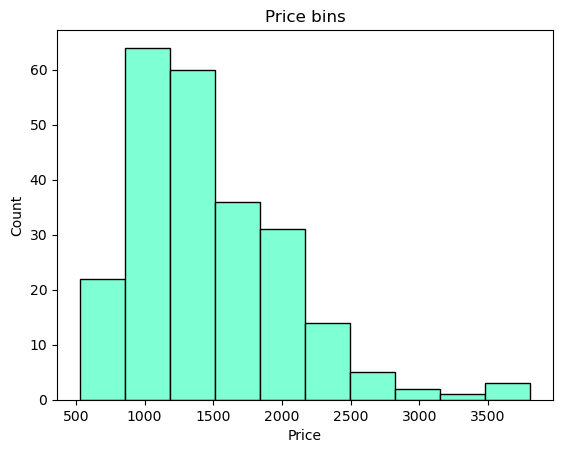

In [21]:
# Create 3 bins for the attribute "Price", named: "Low", "Medium", and "High"
#Plot the histogram to see the distribution

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Price"], color='aquamarine', edgecolor='black')
#Set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Price bins")

In [15]:
# Build a bin array with minimum value to maximum value 
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)

# Set group names
group_names = ['Low', 'Medium', 'High']

# Apply the function cut to determine what each value of the attribute belongs to
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
df[['Price','Price-binned']].head(5)

# Set the number of units in each bin
df["Price-binned"].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

Text(0.5, 1.0, 'Price bins')

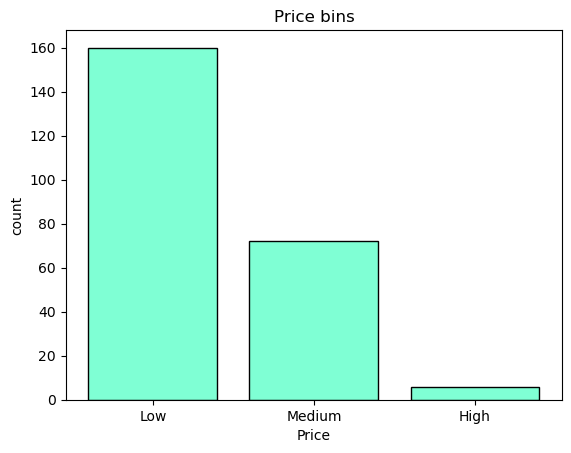

In [20]:
# plot the bar graph of these bins
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["Price-binned"].value_counts(), color='aquamarine', edgecolor='black')
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")


Text(0.5, 1.0, 'Price bins')

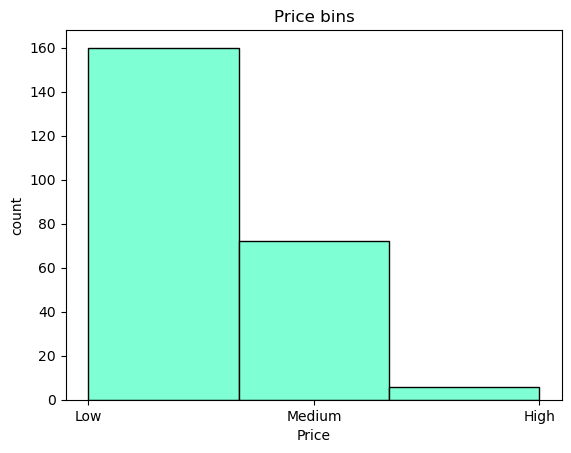

In [22]:
# Bin visualization
plt.pyplot.hist(df["Price-binned"], bins = 3, color='aquamarine', edgecolor='black')

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")


#### Indicator variables

In [18]:
# Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"], dtype=int)
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [19]:
df.head(10)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,0.725624,978,Low,0,1
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,0.997732,634,Low,1,0
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,0.997732,946,Low,1,0
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,0.553288,1244,Low,0,1
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,0.866213,837,Low,1,0
5,5,Dell,3,1,1,5,15.598425,0.551724,8,256,0.997732,1016,Low,1,0
6,6,HP,3,3,1,5,15.598425,0.551724,8,256,0.952381,1117,Low,1,0
7,7,Acer,3,2,1,5,15.000000,0.551724,4,256,0.997732,866,Low,0,1
8,8,Dell,3,1,1,5,15.598425,0.862069,4,256,1.043084,812,Low,1,0
9,9,Acer,3,3,1,7,15.000000,0.620690,8,256,0.997732,1068,Low,0,1
